<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0037_AluraBB_Clustering_ExtraindoPadroes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/julianovale/BB_Evolution/main/Arquivos/CC%20GENERAL.csv'

dataframe = pd.read_csv(url)
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Pré-processamento

In [3]:
dataframe.shape

(8950, 18)

In [4]:
dataframe.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
dataframe.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
dataframe.columns.ravel()

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

In [7]:
dataframe.drop(columns=['CUST_ID','TENURE'], inplace = True) # excluindo ID e uma coluna (Tenure) com valores iguais para todos os objetos.

In [8]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [9]:
dataframe.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [10]:
dataframe.fillna(dataframe.median(), inplace = True) # preenchendo com a mediana

In [11]:
dataframe.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

## Um "parênteses": dropna

aqui eu excluí os faltantes, tanto em objetos (axis = 0, que é default do dropna) quanto em atributos (axis = 1).

In [12]:
teste = pd.read_csv(url)
teste.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
teste.shape

(8950, 18)

In [14]:
teste.dropna(inplace = True) # excluindo os objetos com "na"
teste.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
teste.shape

(8636, 18)

In [16]:
teste1 = pd.read_csv(url)
teste1.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
teste1.shape

(8950, 18)

In [18]:
teste1.dropna(axis = 1, inplace = True) # excluindo os atributos com "na"
teste1.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [19]:
teste1.shape

(8950, 16)

# Continuando o pré-processamento

In [20]:
# normalizando

from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


# Clusterizando

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(values)

In [22]:
y_pred.shape

(8950,)

In [23]:
y_pred[0:5]

array([0, 3, 0, 0, 1], dtype=int32)

## Métricas de validação

**Externas**: quanto tenho rótulos. (Não é o caso).

**Internas**: quando não possuo os rótulos (para problemas de clustering, eu não tenho os rótulos), então vejamos algumas métricas:



1.   **Compactação**, que nos relata quão próximos estão os pontos em um mesmo cluster. 
2.   **Separação**, que indica quão bem separados estão os pontos em clusters diferentes (distância dos clusters).


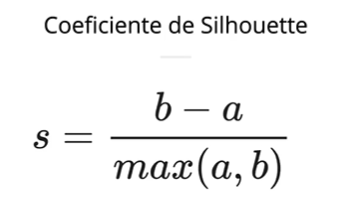

Onde: a = compactação; e, b = separação.

O coeficiente de silhouette varia de -1 a 1. **Regra de decisão**: Valores positivos demonstram que a clusterização é válida. 



In [24]:
# calculando
# o valor obtido é maior que zero, então a clusterização é válida.

from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36457606314711744


### Davies-Bouldin

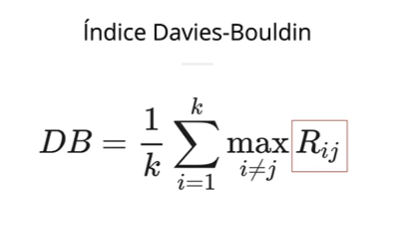

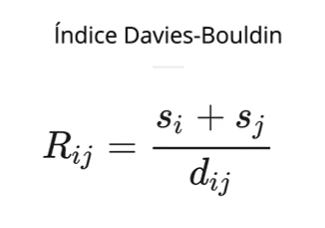

O "S" é a similaridade dentro do cluster, isto é, **compactação**, dada pela distância entre cada elemento e o centroide do cluster. Já o "d" reflete a similaridade entre clusters, a **separação**, que é calculado a partir da distância entre os centroides de todos os clusters. Assim temos os dois critérios importantes çara uma boa validação que já discutimos.

Para estas distâncias, se utiliza a distância euclidiana.

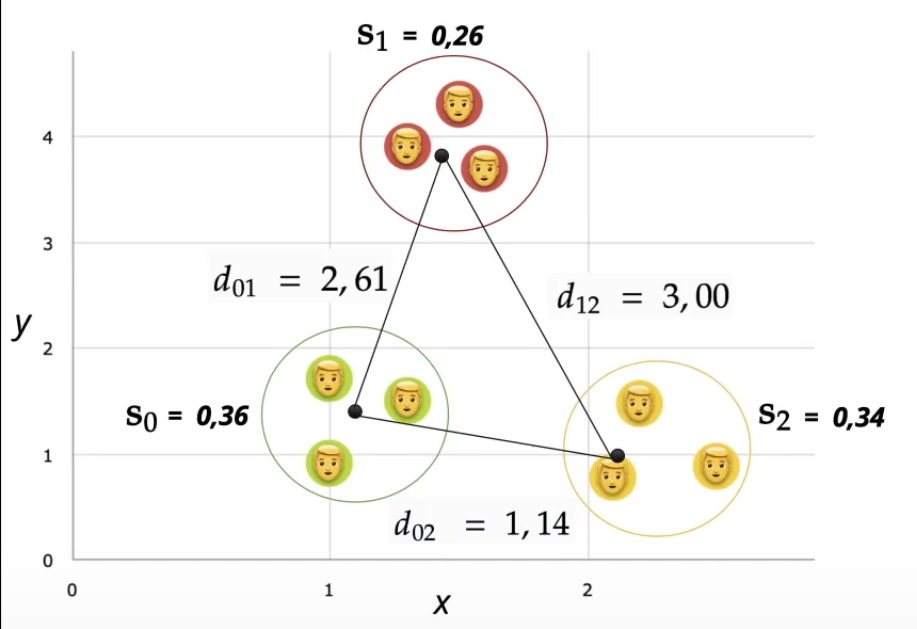

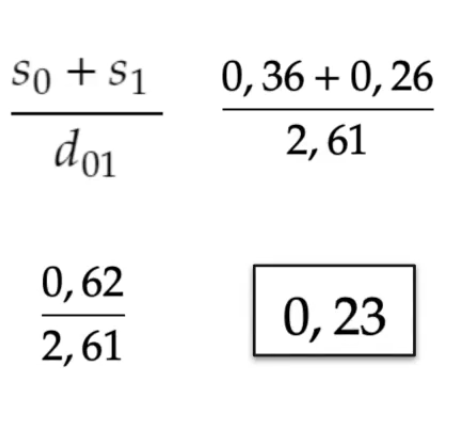

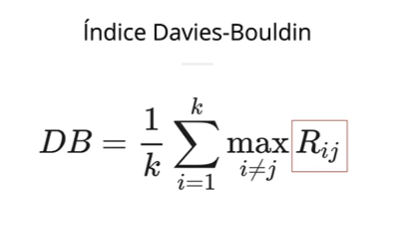

In [25]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0749530537541763


## índice Calinski-Harabasz

In [26]:
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3431.58002074861


## Analisando os três valores

Na métrica de Silhouette, sabemos que o valor tem um intervalo que vai de -1 até 1, portanto se o cluster obter um valor positivo isso é um bom sinal.

No caso da métrica de Davies Bouldin, quanto mais próximo de 0 o valor, melhor. Já para Calinski, é melhor que o valor seja o mais alto possível.

In [27]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [28]:
n = 10

for i in range(n):
    s, dbs, calinski = clustering_algorithm(i+2, values)
    print('clusters =', i+2)
    print('s = ', s)
    print('dbs = ', dbs)
    print('calinski = ', calinski)
    print('--------')

clusters = 2
s =  0.29913992027435277
dbs =  1.5180867343147848
calinski =  3321.84635812273
--------
clusters = 3
s =  0.3272203126696238
dbs =  1.309607364008843
calinski =  3526.440519908274
--------
clusters = 4
s =  0.34825743673945714
dbs =  1.2212897290249243
calinski =  3528.7176223195847
--------
clusters = 5
s =  0.3645055324417282
dbs =  1.0756856623533981
calinski =  3431.800717231779
--------
clusters = 6
s =  0.3648544574844091
dbs =  1.045346318038766
calinski =  3523.516921381918
--------
clusters = 7
s =  0.32764602129331183
dbs =  1.1517618850515992
calinski =  3398.3808256964467
--------
clusters = 8
s =  0.30904411906248463
dbs =  1.174164043127407
calinski =  3239.1044116604035
--------
clusters = 9
s =  0.3008503211333466
dbs =  1.1731815775333807
calinski =  3076.3246152903416
--------
clusters = 10
s =  0.35159139018936747
dbs =  1.1143897249614185
calinski =  3019.1507786889465
--------
clusters = 11
s =  0.3024486922155057
dbs =  1.1514865243121013
calinski = 

## Análise:

Os melhores valores foram obtidos com 6 clusters.

Mas no curso, como a instrutora não avaliou de forma recursiva, ela escolheu continuar com 5 clusters (que também não está ruim).

# Outra avaliação

Outra forma de validação é comparar os valores que obtemos do nosso dataset com outros de um banco de dados aleatório. A ideia é que possamos garantir que nosso conjunto de dados apresente melhores métricas, e por conseguinte, uma estrutura capaz de ser clusterizada.


In [29]:
# vou trabalhar com um conjunto aleatório do mesmo tamanho que meu conjunto de dados e avaliar a clusterização

import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print('s = ', s)
print('dbs = ', dbs)
print('calinski = ', calinski)

s =  0.03960257286753628
dbs =  3.5024024573895134
calinski =  303.41399439881116


Se comparados os valores obtidos aleatoriamente, abaixo:

s =  0.040218341206280754; 
dbs =  3.5055451377398894; e, 
calinski =  304.98695440748236.


é pior que os valores obtidos em meus clusters:

s =  0.3645252169780562; 
dbs =  1.0756224069224563; e, 
calinski =  3431.798945679164.

O que valida meus clusters.



# Avaliando a estabilidade dos clusters


Nosso próximo passo é validar a estabilidade do cluster. A ideia é que dividamos a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação.

In [30]:
# testando 5 clusters

set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36871947128237154 1.0562346825020212 1204.1115110650273
0.35416642754504835 1.1382306445993164 1194.9519865048883
0.36704188760608253 1.0984932613776761 1167.5309516804


In [31]:
# testando 6 clusters

set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(6, set1)
s2, dbs2, calinski2 = clustering_algorithm(6, set2)
s3, dbs3, calinski3 = clustering_algorithm(6, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3642158840603263 1.022583625615647 1192.3888432175577
0.36467105021404594 1.0617476557768526 1169.4433048135393
0.37228131641044865 1.041683545578118 1184.7955898453185


Teremos valores parecidos nas três colunas e com as métricas diferentes, isso indica que nosso cluster é válido.

# Gerando gráficos

In [32]:
# clusterizando novamente com 5 clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
labels = kmeans.fit_predict(values)

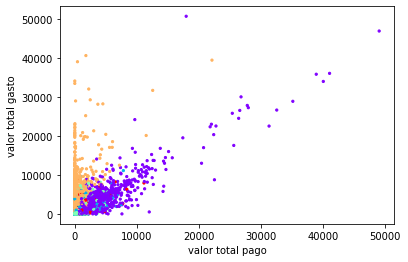

In [33]:
import matplotlib.pyplot as plt

plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show()

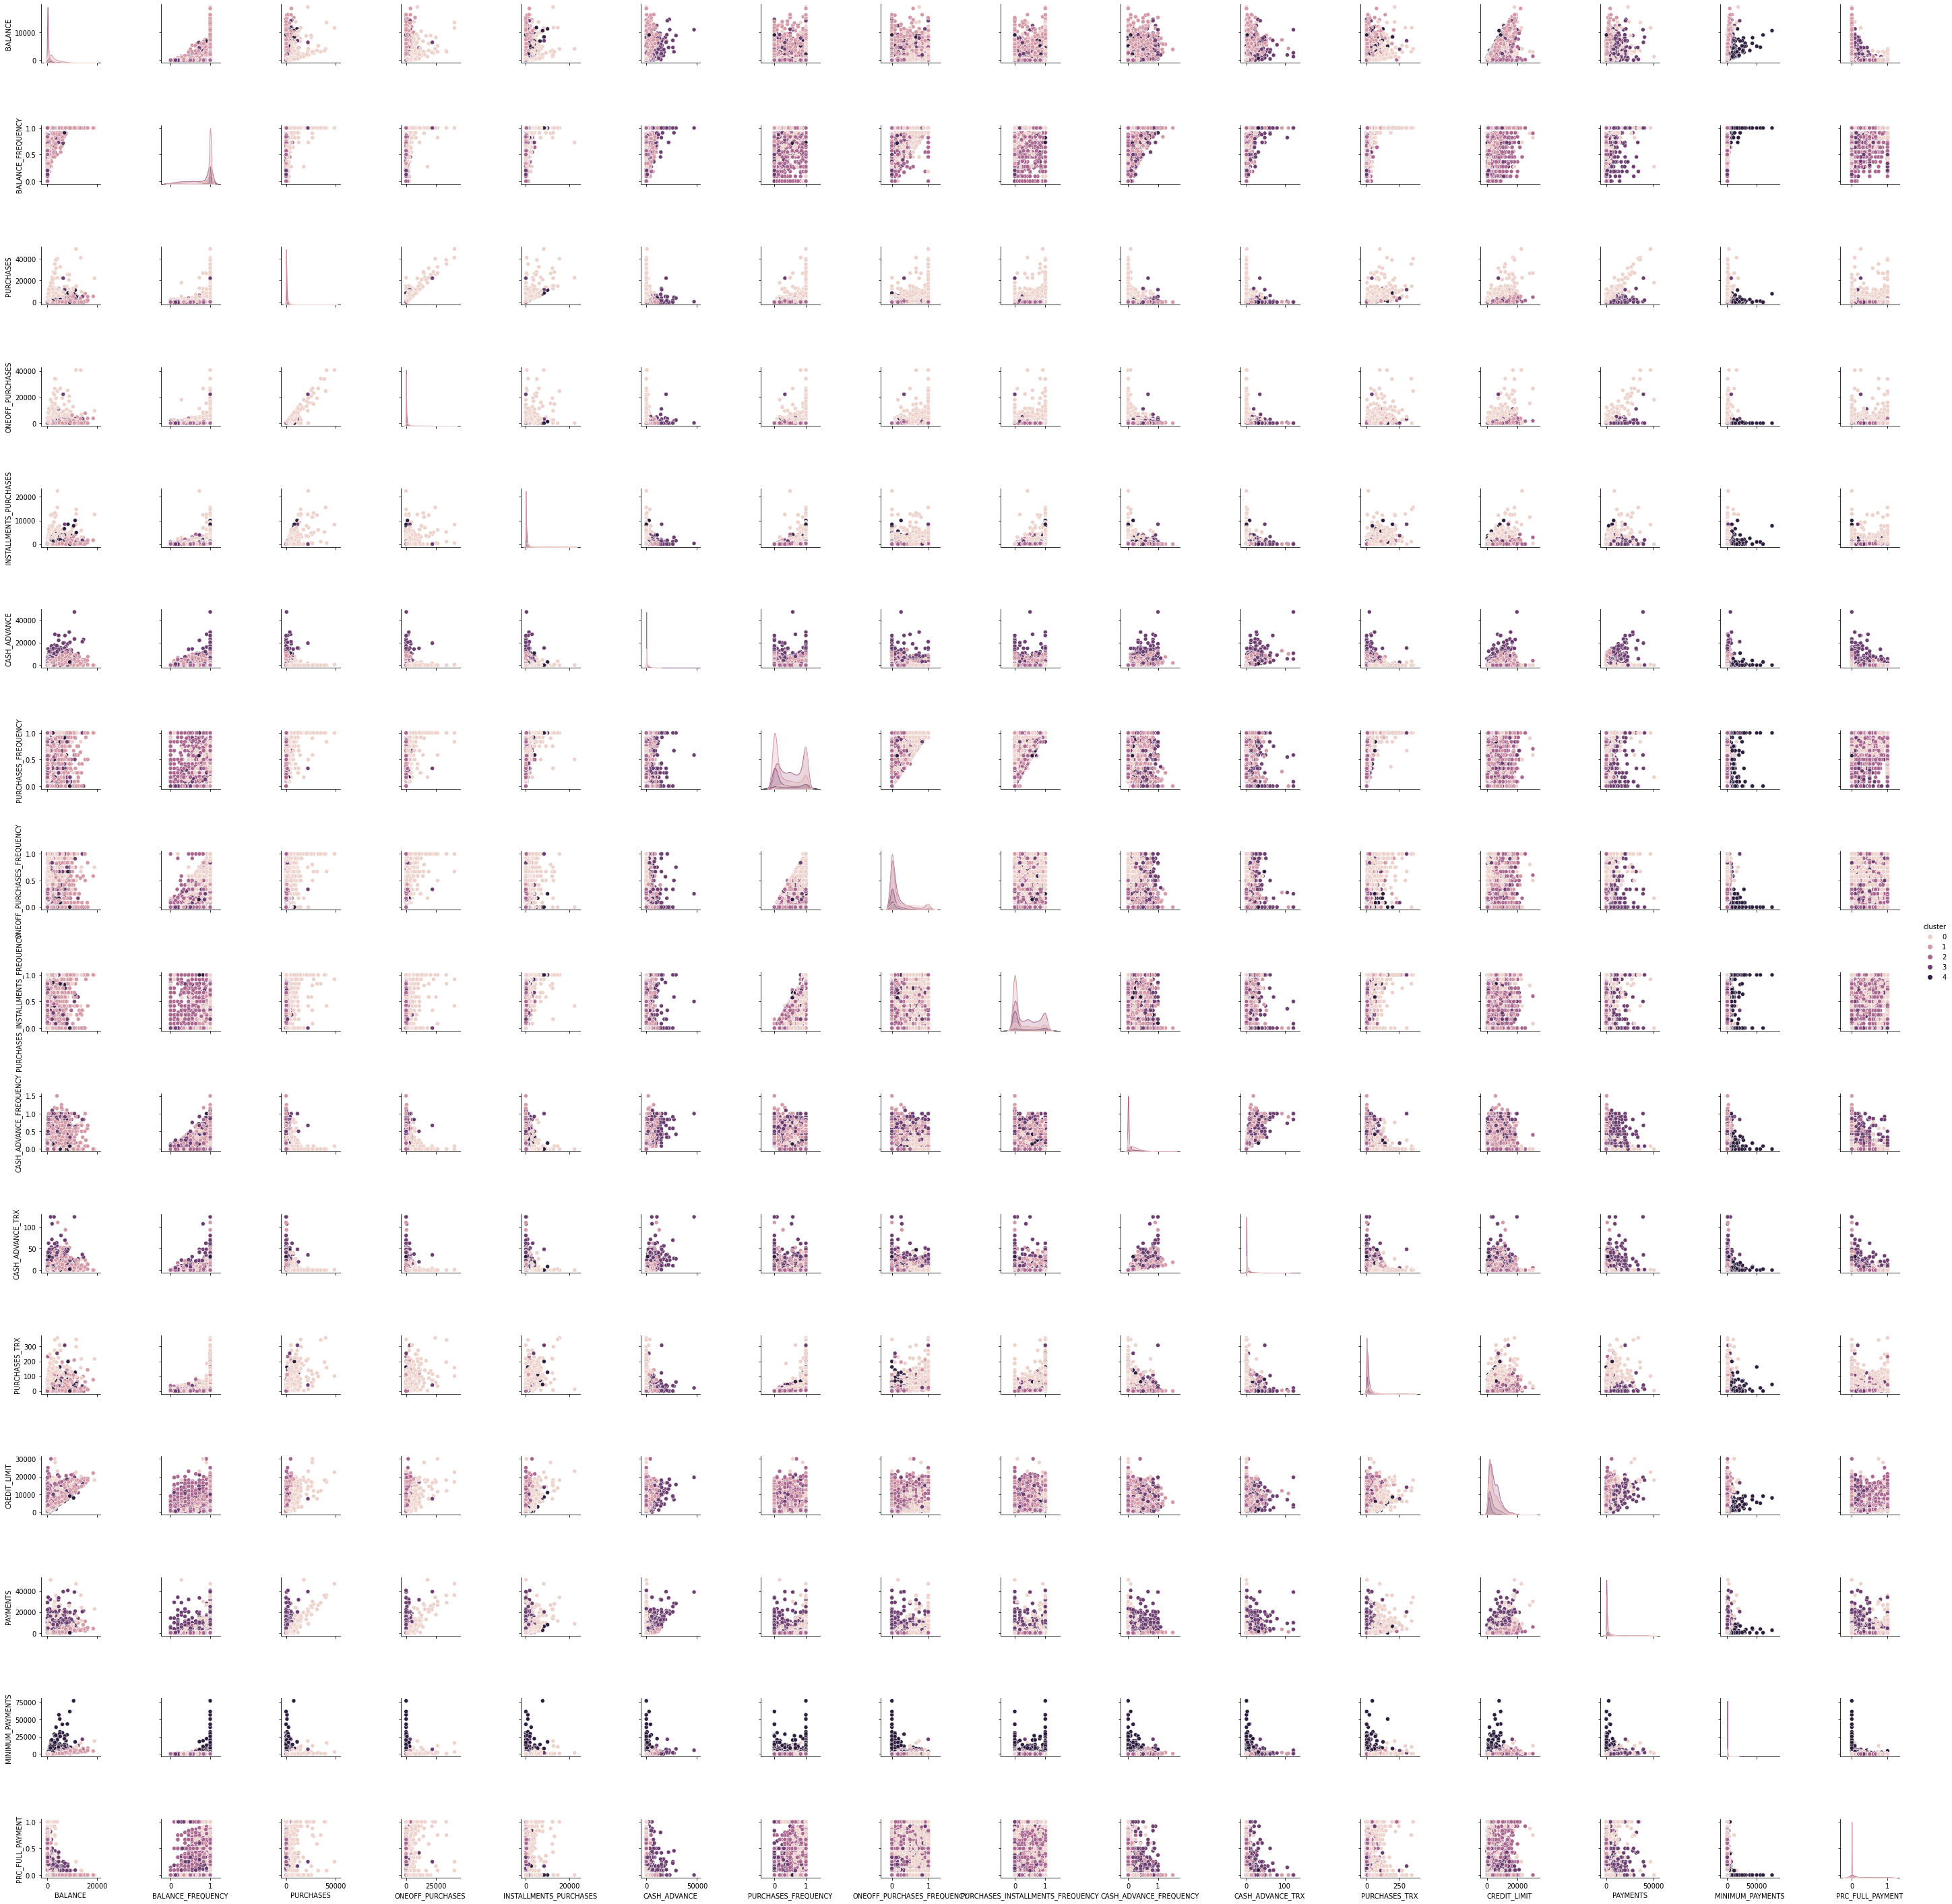

In [34]:
# usando o seaborn

import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

Feito isso teremos um grande conjunto de gráficos, todos divididos em pares, cerca de 280. São muitos, e isso dificulta nosso processo de validação as informações com a visualização dessa forma.

A visualização nem sempre é uma técnica que irá nos auxiliar na interpretação de clusters.

In [35]:
dataframe.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        1544.0  1144.749900  1670.581114  ...         0.083333  0.545455  1.0
1        2648.0  3036.222685  2477.688065  ...         0.000000  0.000000  0.6
2        3275.0   444.146902   846.930394  ...         0.000000  0.444444  1.0
3        1072.0  1794.024195  1982.950586  ...         0.083333  0.142857  1.0
4         411.0  1987.501586  1854.459156  ...         0.000000  0.000000  1.0

[5 rows x 128 columns]

# Analisando os atributos de maior variância

Ainda está difícil de entender alguma coisa. A tabela está grande...

A estratégia que vamos adotar é selecionar os atributos com maior variância.

In [36]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.59970277e-01 2.45420653e-04 4.37832758e-01 2.56342445e-01
  1.81661269e-01 2.57701902e-02 2.04632150e-04 8.87805917e-05
  1.51042337e-04 9.36227386e-06 1.69268877e-04 6.17437812e-03
  6.04822057e-01 4.02343053e-01 8.52508929e-02 7.25704005e-05]
 [5.04120176e-01 2.72279423e-04 6.16154059e-02 3.61332045e-02
  2.55039227e-02 2.53213629e-01 6.73145543e-05 2.56928004e-05
  4.50515920e-05 5.74730416e-05 1.15776055e-03 1.32966204e-03
  7.19195953e-01 1.66119756e-01 1.79220769e-01 5.52512128e-07]
 [6.91174009e-02 2.30606539e-04 1.21226581e-01 4.79772863e-02
  7.33497068e-02 2.41947578e-02 1.72617514e-04 3.36929404e-05
  1.40042773e-04 7.92242513e-06 1.23760508e-04 2.85805113e-03
  9.43803334e-01 1.53494462e-01 5.68407863e-02 7.58440293e-05]
 [2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [3.

In [37]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"{:.4f}".format(centroids[:, i].var()))
    print('--------')

BALANCE 0.0224
--------
BALANCE_FREQUENCY 0.0000
--------
PURCHASES 0.0196
--------
ONEOFF_PURCHASES 0.0076
--------
INSTALLMENTS_PURCHASES 0.0036
--------
CASH_ADVANCE 0.0226
--------
PURCHASES_FREQUENCY 0.0000
--------
ONEOFF_PURCHASES_FREQUENCY 0.0000
--------
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
--------
CASH_ADVANCE_FREQUENCY 0.0000
--------
CASH_ADVANCE_TRX 0.0000
--------
PURCHASES_TRX 0.0000
--------
CREDIT_LIMIT 0.0360
--------
PAYMENTS 0.0280
--------
MINIMUM_PAYMENTS 0.0542
--------
PRC_FULL_PAYMENT 0.0000
--------


Vamos selecionar aqueles cuja variância foi maior que 0.009:

BALANCE 0.0224

PURCHASES 0.0196

CASH_ADVANCE 0.0226

CREDIT_LIMIT 0.0360

PAYMENTS 0.0280

MINIMUM_PAYMENTS 0.0542





BALANCE = limite disponível do cliente  <br/> 
PURCHASES = valor total de compras <br/>
CASH_ADVANCE = valor total de saques <br/>
CREDIT_LIMIT = limite total de crédito <br/>
PAYMENTS = valor total pago <br/>
MINIMUM_PAYMENTS = o mínimo pago <br/>

In [38]:
dataframe.groupby('cluster')['BALANCE'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1544.0,1144.749900,1670.581114,0.000000,210.375599,554.332740,1370.859355,19043.138560
1,2648.0,3036.222685,2477.688065,6.824905,1256.126442,2173.994774,4223.841054,18495.558550
2,3275.0,444.146902,846.930394,0.000000,23.283648,82.980060,410.659944,9630.367575
3,1072.0,1794.024195,1982.950586,0.000000,506.925348,1087.920500,2308.762488,14581.459140
4,411.0,1987.501586,1854.459156,70.794108,1018.958891,1337.287314,2138.678431,11670.179850


Vamos usar as médias

In [39]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        1144.749900  3265.474754    182.614490   4101.334295  3034.867347
1        3036.222685   383.621779   1637.535381   4492.371601   967.448625
2         444.146902   628.970831    141.666342   5135.052448   814.094493
3        1794.024195   475.494823   3270.246792   3976.372399  4709.556601
4        1987.501586   854.865815    421.129352   2227.737226  1336.238911


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [40]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1144.749900,3265.474754,182.614490,4101.334295,3034.867347,1544
1,3036.222685,383.621779,1637.535381,4492.371601,967.448625,2648
2,444.146902,628.970831,141.666342,5135.052448,814.094493,3275
3,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411


CLUSTER 2: Clientes que gastam pouco.<br/>
CLUSTER 1: Clientes que mais gastam. Foco em saques.<br/>
CLUSTER 0: Clientes que gastam muito com compras.<br/>
CLUSTER 3: Clientes que gastam muito com saques.<br/>
CLUSTER 4: Clientes com os menores limites de crédito.<br/>

In [42]:
# percentual de pagamento total da fatura
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1544.0,0.278724,0.367326,0.0,0.0,0.083333,0.545455,1.0
1,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
2,3275.0,0.246368,0.346480,0.0,0.0,0.000000,0.444444,1.0
3,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0


CLUSTER 2: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 0: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

# Em resumo:

O Cluster 2 está bastante claro na sua proposta e representam a maior quantidade de clientes, isto é, aqueles que gastam pouco e tem o maior limite, além de tudo são bons pagadores da fatura.

O Cluster 1 representa os clientes que amais gastam, com foco no uso de cartão para saque de dinheiro e são os piores pagadores.

O Cluster 0 representam os clientes que gastam com compras e pagam suas faturas adequadamente, o que reflete uma boa saúde financeira.

Cluster 3 possui uma quantidade padrão de clientes que gastam muito com saques.

Cluster 4 refletem os clientes com o menor limite no cartão e que não são bons pagadores de suas faturas, por sorte, representam a menor quantidade de clientes da empresa.

# Utilizando os clusters - exemplo:

Trabalharemos com o cluster 2. Queremos que esses clientes gastem mais para incentivar o lucro na empresa. Suponhamos que a estratégia seja fazer uma parceria com uma empresa de pontos que forneça benefícios para o cliente que usar mais o crédito.

Para verificarmos se a nossa estratégia foi eficaz e utilizamos o grupo certo, faremos o chamado **teste AB**. Dividiremos o os clientes do cluster 0 em **dois grupos**: o **grupo de controle** e o **grupo de teste**.

o **grupo de controle** permanecerá *sem nenhuma modificação*, ou seja, não haverá programa de pontos. Já o **grupo de teste**, em um período definido, *receberá o programa de pontos*.

Ao final do período, **verificaremos se as pessoas que participaram do programa de pontos gastaram mais com o cartão ou não**. Assim teremos um resultado confiável, com clientes com características similares.